In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pprint import pprint
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from pandas.plotting import lag_plot


plt.rcParams.update({'font.size': 16})

In [5]:
df_Tuol = pd.read_csv('SWE_NLDAS_Tuolumne.txt',delimiter="\t")
df_Merc = pd.read_csv('SWE_NLDAS_Merced.txt',delimiter="\t")
df_Amer = pd.read_csv('SWE_NLDAS_American.txt',delimiter="\t")
df_Feat = pd.read_csv('SWE_NLDAS_Feather.txt',delimiter="\t")

In [135]:
#df = df.drop("Date", axis=1, inplace=True)
df.head()

,Date,TAIR(K),QAIR(Kg/Kg),PSURF(Pa),WINDE(m/s),WINDN(m/s),LRAD(W/m2),PRCP(mm/day),PRCP_avg(mm/day),SRAD(W/m2),SWE
0,10/1/1984,279.17,0.0051,81550.98,2.24,2.24,303.44,1.603,0.067,135.35,0.0
1,10/2/1984,281.44,0.0049,81780.42,-0.70,-0.70,256.37,0.071,0.003,213.79,0.0
2,10/3/1984,283.27,0.0050,81869.04,1.09,1.09,261.40,0.000,0.000,213.03,0.0
3,10/4/1984,283.39,0.0049,81930.18,1.74,1.74,259.68,0.000,0.000,211.59,0.0
4,10/5/1984,283.02,0.0049,81953.54,0.89,0.89,254.77,0.000,0.000,209.98,0.0


In [74]:
df.tail()

,TAIR(K),QAIR(Kg/Kg),PSURF(Pa),WINDE(m/s),WINDN(m/s),LRAD(W/m2),PRCP(mm/day),PRCP_avg(mm/day),SRAD(W/m2),SWE
11683,290.98,0.0041,82506.89,-1.32,-1.32,277.44,0.0,0.0,227.92,0.317
11684,291.16,0.0041,82264.06,0.28,0.28,275.94,0.0,0.0,226.80,0.310
11685,291.22,0.0041,82080.91,0.35,0.35,278.47,0.0,0.0,222.98,0.304
11686,289.84,0.0045,82231.88,1.98,1.98,279.66,0.0,0.0,220.49,0.298
11687,287.52,0.0047,82278.71,1.80,1.80,271.91,0.0,0.0,218.68,0.298


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TAIR(K)           11688 non-null  float64
 1   QAIR(Kg/Kg)       11688 non-null  float64
 2   PSURF(Pa)         11688 non-null  float64
 3   WINDE(m/s)        11688 non-null  float64
 4   WINDN(m/s)        11688 non-null  float64
 5   LRAD(W/m2)        11688 non-null  float64
 6   PRCP(mm/day)      11688 non-null  float64
 7   PRCP_avg(mm/day)  11688 non-null  float64
 8   SRAD(W/m2)        11688 non-null  float64
 9   SWE               11688 non-null  float64
dtypes: float64(10)
memory usage: 913.2 KB


# Data Scaling 

In [6]:
scaler = preprocessing.MinMaxScaler()

df_Tuol.drop("Date", axis=1, inplace=True)
names = df_Tuol.columns
d = scaler.fit_transform(df_Tuol)
scaled_df_Tuol = pd.DataFrame(d, columns=names)
scaled_df_Tuol.head()

df_Merc.drop("Date", axis=1, inplace=True)
scaler = preprocessing.MinMaxScaler()
names = df_Merc.columns
d = scaler.fit_transform(df_Merc)
scaled_df_Merc = pd.DataFrame(d, columns=names)

df_Amer.drop("Date", axis=1, inplace=True)
scaler = preprocessing.MinMaxScaler()
names = df_Amer.columns
d = scaler.fit_transform(df_Amer)
scaled_df_Amer = pd.DataFrame(d, columns=names)

df_Feat.drop("Date", axis=1, inplace=True)
scaler = preprocessing.MinMaxScaler()
names = df_Feat.columns
d = scaler.fit_transform(df_Feat)
scaled_df_Feat = pd.DataFrame(d, columns=names)

In [7]:
X_Tuol = scaled_df_Tuol[['PRCP(mm/day)','SRAD(W/m2)','LRAD(W/m2)','TAIR(K)','WINDE(m/s)','WINDN(m/s)','PSURF(Pa)']]
Y_Tuol = scaled_df_Tuol['SWE']
X_Tuol.head(10)

X_Merc = scaled_df_Merc[['PRCP(mm/day)','SRAD(W/m2)','LRAD(W/m2)','TAIR(K)','WINDE(m/s)','WINDN(m/s)','PSURF(Pa)']]
Y_Merc = scaled_df_Merc['SWE']

X_Amer = scaled_df_Amer[['PRCP(mm/day)','SRAD(W/m2)','LRAD(W/m2)','TAIR(K)','WINDE(m/s)','WINDN(m/s)','PSURF(Pa)']]
Y_Amer = scaled_df_Amer['SWE']

X_Feat = scaled_df_Feat[['PRCP(mm/day)','SRAD(W/m2)','LRAD(W/m2)','TAIR(K)','WINDE(m/s)','WINDN(m/s)','PSURF(Pa)']]
Y_Feat = scaled_df_Feat['SWE']

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRCP(mm/day)  11688 non-null  float64
 1   SRAD(W/m2)    11688 non-null  float64
 2   LRAD(W/m2)    11688 non-null  float64
 3   TAIR(K)       11688 non-null  float64
 4   WINDE(m/s)    11688 non-null  float64
 5   WINDN(m/s)    11688 non-null  float64
 6   PSURF(Pa)     11688 non-null  float64
dtypes: float64(7)
memory usage: 639.3 KB


# Train, Test, Split

In [8]:
x_train_Tuol, x_test_Tuol,y_train_Tuol,y_test_Tuol = train_test_split(X_Tuol,Y_Tuol,test_size =0.2)
x_train_Tuol

x_train_Merc, x_test_Merc,y_train_Merc,y_test_Merc = train_test_split(X_Merc,Y_Merc,test_size =0.2)

x_train_Amer, x_test_Amer,y_train_Amer,y_test_Amer = train_test_split(X_Amer,Y_Amer,test_size =0.2)

x_train_Feat, x_test_Feat,y_train_Feat,y_test_Feat = train_test_split(X_Feat,Y_Feat,test_size =0.2)

In [9]:
print (x_train_Tuol.shape, y_train_Tuol.shape)
print (x_test_Tuol.shape, y_test_Tuol.shape)

(9350, 7) (9350,)
(2338, 7) (2338,)


# Multiple Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

clf = LinearRegression()
clf.fit(x_train_Tuol,y_train_Tuol)
y_pred_Tuol=clf.predict(x_test_Tuol)
#print(y_pred_Tuol)
print("R-squared for Tuolumne: {}".format(clf.score(x_test_Tuol,y_test_Tuol))) #r^2
print("Mean squared error for Tuolumne: {}".format(mean_squared_error(y_test_Tuol, y_pred_Tuol)))
print("Mean absolute error for Tuolumne: {}".format(mean_absolute_error(y_test_Tuol, y_pred_Tuol)))
PBIAS_Tuol = 100*((y_test_Tuol - y_pred_Tuol).sum())/(y_test_Tuol.sum())
print("PBIAS for Tuolumne: {}".format(PBIAS_Tuol))
print("\n")

clf.fit(x_train_Merc,y_train_Merc)
y_pred_Merc=clf.predict(x_test_Merc)
#print(y_pred_Merc)
print("R-squared for Merced: {}".format(clf.score(x_test_Merc,y_test_Merc))) #r^2
print("Mean squared error for Merced: {}".format(mean_squared_error(y_test_Merc, y_pred_Merc)))
print("Mean absolute error for Merced: {}".format(mean_absolute_error(y_test_Merc, y_pred_Merc)))
PBIAS_Merc = 100*((y_test_Merc - y_pred_Merc).sum())/(y_test_Merc.sum())
print("PBIAS for Merced: {}".format(PBIAS_Merc))
print("\n")

clf.fit(x_train_Amer,y_train_Amer)
y_pred_Amer=clf.predict(x_test_Amer)
#print(y_pred_Amer)
print("R-squared for American: {}".format(clf.score(x_test_Amer,y_test_Amer))) #r^2
print("Mean squared error for American: {}".format(mean_squared_error(y_test_Amer, y_pred_Amer)))
print("Mean absolute error for American: {}".format(mean_absolute_error(y_test_Amer, y_pred_Amer)))
PBIAS_Amer = 100*((y_test_Amer - y_pred_Amer).sum())/(y_test_Amer.sum())
print("PBIAS for American: {}".format(PBIAS_Amer))
print("\n")

clf.fit(x_train_Feat,y_train_Feat)
y_pred_Feat=clf.predict(x_test_Feat)
#print(y_pred_Feat)
print("R-squared for Feather: {}".format(clf.score(x_test_Feat,y_test_Feat))) #r^2
print("Mean squared error for Feather: {}".format(mean_squared_error(y_test_Feat, y_pred_Feat)))
print("Mean absolute error for Feather: {}".format(mean_absolute_error(y_test_Feat, y_pred_Feat)))
PBIAS_Feat = 100*((y_test_Feat - y_pred_Feat).sum())/(y_test_Feat.sum())
print("PBIAS for Feather: {}".format(PBIAS_Feat))

R-squared for Tuolumne: 0.39227163074701177
Mean squared error for Tuolumne: 0.03170058474518025
Mean absolute error for Tuolumne: 0.13044044313424943
PBIAS for Tuolumne: 2.575996297516285


R-squared for Merced: 0.37520272949221123
Mean squared error for Merced: 0.031864770768128096
Mean absolute error for Merced: 0.13062956525444805
PBIAS for Merced: 3.482740425482817


R-squared for American: 0.3490683450855484
Mean squared error for American: 0.02331679729270043
Mean absolute error for American: 0.10838730505596415
PBIAS for American: 1.1036745997273385


R-squared for Feather: 0.3062114521323157
Mean squared error for Feather: 0.01845365306852329
Mean absolute error for Feather: 0.09493507330663416
PBIAS for Feather: -1.0392360996905985


Text(0.5, -0.2, '(d)')

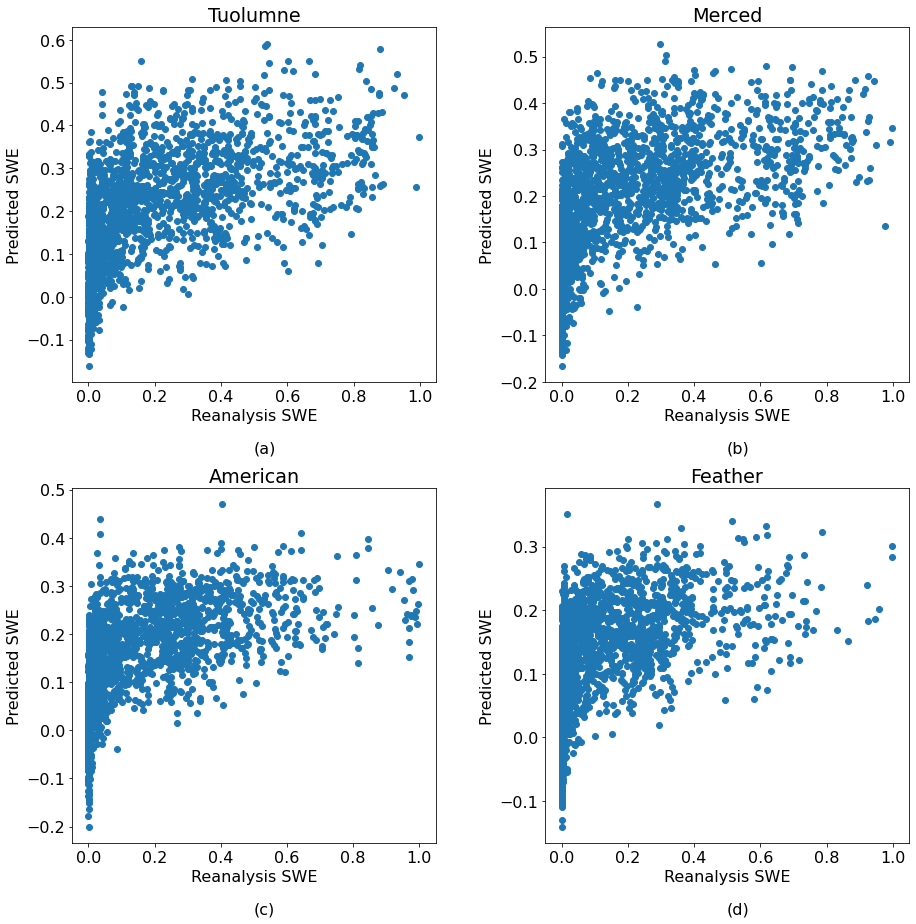

In [11]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1 = plt.subplot(2,2,1)
ax1.scatter(y_test_Tuol,y_pred_Tuol);
ax1.set_ylabel('Predicted SWE')
ax1.set_xlabel('Reanalysis SWE')
ax1.set_title("Tuolumne")
#ax1.text(0.5,0.2,"R-squared = 0.39",transform=ax1.transAxes,bbox=props)
ax1.text(0.5,-0.2,"(a)",transform=ax1.transAxes,fontsize=16)

ax2 = plt.subplot(2,2,2)
ax2.scatter(y_test_Merc,y_pred_Merc);
ax2.set_ylabel('Predicted SWE')
ax2.set_xlabel('Reanalysis SWE')
ax2.set_title("Merced")
#ax2.text(0.5,0.2,"R-squared = 0.37",transform=ax2.transAxes,bbox=props)
ax2.text(0.5,-0.2,"(b)",transform=ax2.transAxes,fontsize=16)

ax3 = plt.subplot(2,2,3)
ax3.scatter(y_test_Amer,y_pred_Amer);
ax3.set_ylabel('Predicted SWE')
ax3.set_xlabel('Reanalysis SWE')
ax3.set_title("American")
#ax3.text(0.5,0.2,"R-squared = 0.36",transform=ax3.transAxes,bbox=props)
ax3.text(0.5,-0.2,"(c)",transform=ax3.transAxes,fontsize=16)

ax4 = plt.subplot(2,2,4)
ax4.scatter(y_test_Feat,y_pred_Feat);
ax4.set_ylabel('Predicted SWE')
ax4.set_xlabel('Reanalysis SWE')
ax4.set_title("Feather")
#ax4.text(0.5,0.2,"R-squared = 0.29",transform=ax4.transAxes,bbox=props)
ax4.text(0.5,-0.2,"(d)",transform=ax4.transAxes,fontsize=16)

# Random Forest

## Random Grid

In [12]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,
                  138,
                  177,
                  216,
                  255,
                  293,
                  332,
                  371,
                  410,
                  448,
                  487,
                  526,
                  565,
                  604,
                  642,
                  681,
                  720,
                  759,
                  797,
                  836,
                  875,
                  914,
                  953,
                  991,
                  1030,
                  1069,
                  1108,
                  1146,
                  1185,
                  1224,
                  1263,
                  1302,
                  1340,
                  1379,
          

## Randomized Search for hyper parameter tuning  

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import GridSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_Tuol, y_train_Tuol)
print("Random Forest Regressor, Tuolumne, Best Random Paramters are {}".format(rf_random.best_params_))
print("Random Forest Regressor, Tuolumne, R-squared is {}".format(rf_random.score(x_test_Tuol,y_test_Tuol)))
print("\n")

rf_random.fit(x_train_Merc, y_train_Merc)
print("Random Forest Regressor, Merced, Best Random Paramters are {}".format(rf_random.best_params_))
print("Random Forest Regressor, Merced, R-squared is {}".format(rf_random.score(x_test_Merc,y_test_Merc)))
print("\n")

rf_random.fit(x_train_Amer, y_train_Amer)
print("Random Forest Regressor, American, Best Random Paramters are {}".format(rf_random.best_params_))
print("Random Forest Regressor, American, R-squared is {}".format(rf_random.score(x_test_Amer,y_test_Amer)))
print("\n")

rf_random.fit(x_train_Feat, y_train_Feat)
print("Random Forest Regressor, Feather, Best Random Paramters are {}".format(rf_random.best_params_))
print("Random Forest Regressor, Feather, R-squared is {}".format(rf_random.score(x_test_Feat,y_test_Feat)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/esthapit/.conda/envs/py3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Random Forest Regressor, Tuolumne, Best Random Paramters are {'n_estimators': 1689, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Random Forest Regressor, Tuolumne, R-squared is 0.49696032137240453


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/esthapit/.conda/envs/py3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Random Forest Regressor, Merced, Best Random Paramters are {'n_estimators': 1689, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Random Forest Regressor, Merced, R-squared is 0.46731571568544905


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/esthapit/.conda/envs/py3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Random Forest Regressor, American, Best Random Paramters are {'n_estimators': 1689, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Random Forest Regressor, American, R-squared is 0.46111527908509586


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/esthapit/.conda/envs/py3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Random Forest Regressor, Feather, Best Random Paramters are {'n_estimators': 1689, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Random Forest Regressor, Feather, R-squared is 0.4085037379907981


## Random Forest Regressor

In [14]:
##Random Forest
regr = RandomForestRegressor(max_depth=10,n_estimators=1689, min_samples_split=5,min_samples_leaf= 4,max_features='auto',random_state=42,bootstrap=True,oob_score=True)
regr.fit(x_train_Tuol, y_train_Tuol)
y_pred_Tuol = regr.predict(x_test_Tuol)
PBIAS = 100*((y_test_Tuol - y_pred_Tuol).sum())/(y_test_Tuol.sum())
print("Random Forest Regressor, Tuolumne, PBIAS is {}".format(PBIAS))
print("Random Forest Regressor, Tuolumne, Out-of-bag score is {}".format(regr.oob_score_))
print("Random Forest Regressor, Tuolumne, R-squared is {}".format(regr.score(x_test_Tuol,y_test_Tuol)))
print("Random Forest Regressor, Tuolumne, Feature Importances are {}".format(regr.feature_importances_))
print("Random Forest Regressor, Tuolumne, RMSE are {}".format(regr.feature_importances_))
print("\n")

regr.fit(x_train_Merc, y_train_Merc)
y_pred_Merc = regr.predict(x_test_Merc)
PBIAS = 100*((y_test_Merc - y_pred_Merc).sum())/(y_test_Merc.sum())
print("Random Forest Regressor, Merced, PBIAS is {}".format(PBIAS))
print("Random Forest Regressor, Merced, Out-of-bag score is {}".format(regr.oob_score_))
print("Random Forest Regressor, Merced, R-squared is {}".format(regr.score(x_test_Merc,y_test_Merc)))
print("Random Forest Regressor, Merced, Feature Importances are {}".format(regr.feature_importances_))
print("Random Forest Regressor, Merced, Feature Importances are {}".format(regr.feature_importances_))
print("\n")

regr.fit(x_train_Amer, y_train_Amer)
y_pred_Amer = regr.predict(x_test_Amer)
PBIAS = 100*((y_test_Amer - y_pred_Amer).sum())/(y_test_Amer.sum())
print("Random Forest Regressor, American, PBIAS is {}".format(PBIAS))
print("Random Forest Regressor, American, Out-of-bag score is {}".format(regr.oob_score_))
print("Random Forest Regressor, American, R-squared is {}".format(regr.score(x_test_Amer,y_test_Amer)))
print("Random Forest Regressor, American, Feature Importances are {}".format(regr.feature_importances_))
print("Random Forest Regressor, American, Feature Importances are {}".format(regr.feature_importances_))
print("\n")

regr.fit(x_train_Feat, y_train_Feat)
y_pred_Feat = regr.predict(x_test_Feat)
PBIAS = 100*((y_test_Feat - y_pred_Feat).sum())/(y_test_Feat.sum())
print("Random Forest Regressor, Feather, PBIAS is {}".format(PBIAS))
print("Random Forest Regressor, Feather, Out-of-bag score is {}".format(regr.oob_score_))
print("Random Forest Regressor, Feather, R-squared is {}".format(regr.score(x_test_Feat,y_test_Feat)))
print("Random Forest Regressor, Feather, Feature Importances are {}".format(regr.feature_importances_))
print("Random Forest Regressor, Feather, Feature Importances are {}".format(regr.feature_importances_))

Random Forest Regressor, Tuolumne, PBIAS is 0.5876484397768724
Random Forest Regressor, Tuolumne, Out-of-bag score is 0.48086494299257854
Random Forest Regressor, Tuolumne, R-squared is 0.49681758407631194
Random Forest Regressor, Tuolumne, Feature Importances are [0.06254222 0.27621898 0.07632521 0.46234737 0.02715919 0.02678169
 0.06862534]
Random Forest Regressor, Tuolumne, RMSE are [0.06254222 0.27621898 0.07632521 0.46234737 0.02715919 0.02678169
 0.06862534]


Random Forest Regressor, Merced, PBIAS is 2.1785124366272814
Random Forest Regressor, Merced, Out-of-bag score is 0.4612811220732046
Random Forest Regressor, Merced, R-squared is 0.4666388177100439
Random Forest Regressor, Merced, Feature Importances are [0.07053922 0.28347694 0.07485702 0.4455642  0.02663412 0.02636872
 0.07255979]
Random Forest Regressor, Merced, Feature Importances are [0.07053922 0.28347694 0.07485702 0.4455642  0.02663412 0.02636872
 0.07255979]


Random Forest Regressor, American, PBIAS is 0.620464400

In [86]:
regr.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1689,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Text(0.5, -0.2, '(d)')

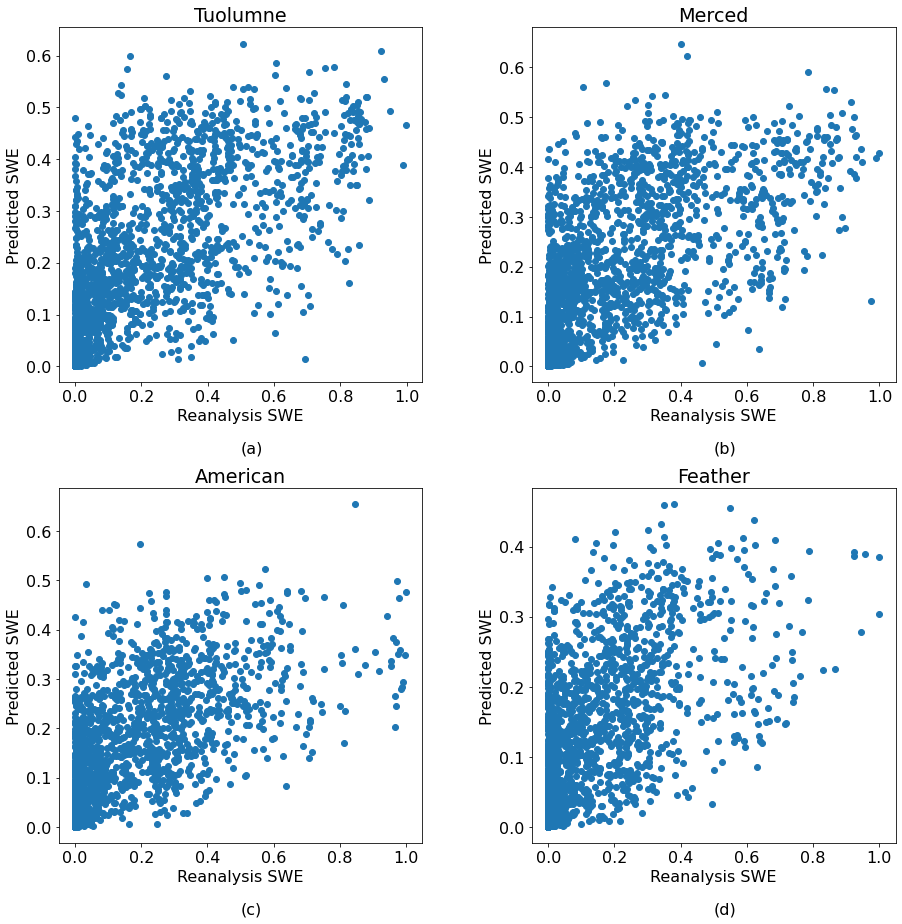

In [15]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1 = plt.subplot(2,2,1)
ax1.scatter(y_test_Tuol,y_pred_Tuol);
ax1.set_ylabel('Predicted SWE')
ax1.set_xlabel('Reanalysis SWE')
ax1.set_title("Tuolumne")
#ax1.text(0.5,0.05,"R-squared = 0.48",transform=ax1.transAxes,bbox=props)
ax1.text(0.5,-0.2,"(a)",transform=ax1.transAxes,fontsize=16)

ax2 = plt.subplot(2,2,2)
ax2.scatter(y_test_Merc,y_pred_Merc);
ax2.set_ylabel('Predicted SWE')
ax2.set_xlabel('Reanalysis SWE')
ax2.set_title("Merced")
#ax2.text(0.5,0.05,"R-squared = 0.46",transform=ax2.transAxes,bbox=props)
ax2.text(0.5,-0.2,"(b)",transform=ax2.transAxes,fontsize=16)

ax3 = plt.subplot(2,2,3)
ax3.scatter(y_test_Amer,y_pred_Amer);
ax3.set_ylabel('Predicted SWE')
ax3.set_xlabel('Reanalysis SWE')
ax3.set_title("American")
#ax3.text(0.5,0.05,"R-squared = 0.47",transform=ax3.transAxes,bbox=props)
ax3.text(0.5,-0.2,"(c)",transform=ax3.transAxes,fontsize=16)

ax4 = plt.subplot(2,2,4)
ax4.scatter(y_test_Feat,y_pred_Feat);
ax4.set_ylabel('Predicted SWE')
ax4.set_xlabel('Reanalysis SWE')
ax4.set_title("Feather")
#ax4.text(0.5,0.05,"R-squared = 0.42",transform=ax4.transAxes,bbox=props)
ax4.text(0.5,-0.2,"(d)",transform=ax4.transAxes,fontsize=16)

# Autocorrelation

Text(0.5, -0.45, '(h)')

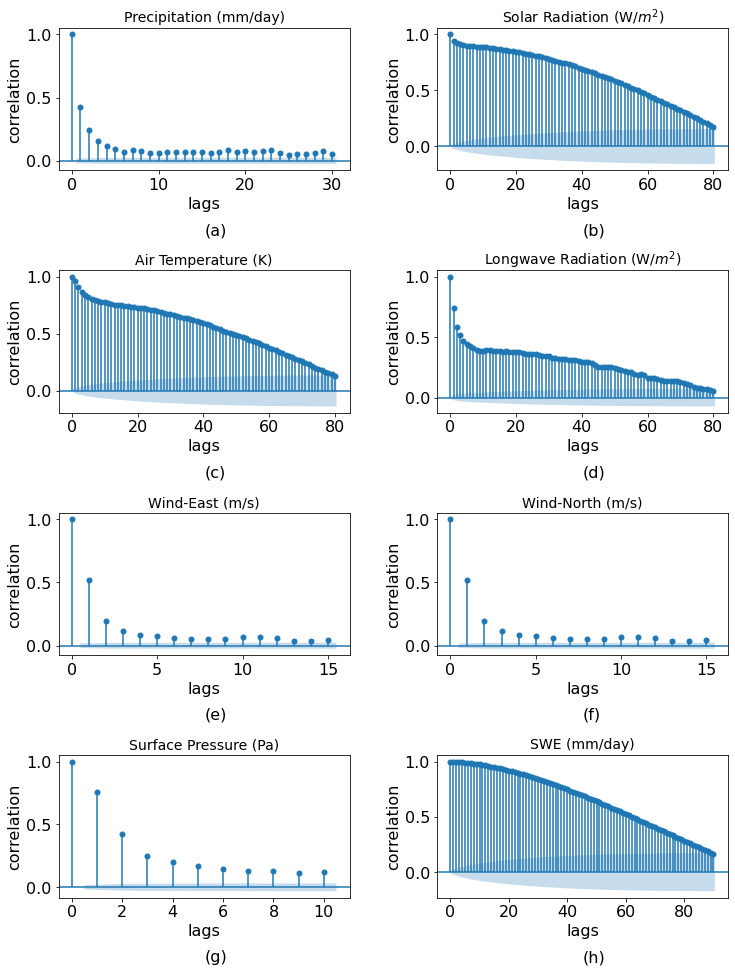

In [37]:
#PRCP(mm/day)	SRAD(W/m2)	LRAD(W/m2)	TAIR(K)	WINDE(m/s)	WINDN(m/s)	PSURF(Pa)
#fig, axes = plt.figure(figsize=(20,20)) #figsize=(20,20)
#fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots()
#matplotlib.rcParams.update({'font.size': 15})

fig, axes = plt.subplots(4,2, figsize =(12,16))
fig.subplots_adjust(hspace=0.7,wspace=0.3)
plot_acf(df_Tuol["PRCP(mm/day)"], lags =30, ax=axes[0,0])
axes[0,0].set_xlabel('lags')
axes[0,0].set_ylabel('correlation')
axes[0,0].set_title("Precipitation (mm/day)", fontsize=14)
axes[0,0].text(0.5,-0.45,"(a)",transform=axes[0,0].transAxes,fontsize=16)
         
plot_acf(df_Tuol["SRAD(W/m2)"], lags =80, ax=axes[0,1])
axes[0,1].set_xlabel('lags')
axes[0,1].set_ylabel('correlation')
axes[0,1].set_title("Solar Radiation (W/$m^2$)", fontsize=14)
axes[0,1].text(0.5,-0.45,"(b)",transform=axes[0,1].transAxes,fontsize=16)

plot_acf(df_Tuol["TAIR(K)"], lags =80, ax=axes[1,0])
axes[1,0].set_xlabel('lags')
axes[1,0].set_ylabel('correlation')
axes[1,0].set_title("Air Temperature (K)", fontsize=14)
axes[1,0].text(0.5,-0.45,"(c)",transform=axes[1,0].transAxes,fontsize=16)

plot_acf(df_Tuol["LRAD(W/m2)"], lags =80, ax=axes[1,1])
axes[1,1].set_xlabel('lags')
axes[1,1].set_ylabel('correlation')
axes[1,1].set_title("Longwave Radiation (W/$m^2$)", fontsize=14)
axes[1,1].text(0.5,-0.45,"(d)",transform=axes[1,1].transAxes,fontsize=16)

plot_acf(df_Tuol["WINDE(m/s)"], lags =15, ax=axes[2,0])
axes[2,0].set_xlabel('lags')
axes[2,0].set_ylabel('correlation')
axes[2,0].set_title("Wind-East (m/s)", fontsize=14)
axes[2,0].text(0.5,-0.45,"(e)",transform=axes[2,0].transAxes,fontsize=16)

plot_acf(df_Tuol["WINDN(m/s)"], lags =15, ax=axes[2,1])
axes[2,1].set_xlabel('lags')
axes[2,1].set_ylabel('correlation')         
axes[2,1].set_title("Wind-North (m/s)", fontsize=14)
axes[2,1].text(0.5,-0.45,"(f)",transform=axes[2,1].transAxes,fontsize=16)

plot_acf(df_Tuol["PSURF(Pa)"], lags =10, ax=axes[3,0])
axes[3,0].set_xlabel('lags')
axes[3,0].set_ylabel('correlation')
axes[3,0].set_title("Surface Pressure (Pa)", fontsize=14)
axes[3,0].text(0.5,-0.45,"(g)",transform=axes[3,0].transAxes,fontsize=16)

plot_acf(df_Tuol["SWE"], lags =90, ax=axes[3,1])
axes[3,1].set_xlabel('lags')
axes[3,1].set_ylabel('correlation')
axes[3,1].set_title("SWE (mm/day)", fontsize=14)
axes[3,1].text(0.5,-0.45,"(h)",transform=axes[3,1].transAxes,fontsize=16)

#fig.tight_layout()

[1.73733208e-01 1.92232926e-01 2.02831338e-01 ... 5.04521726e-05
 2.90494548e-05 8.22995415e-06]


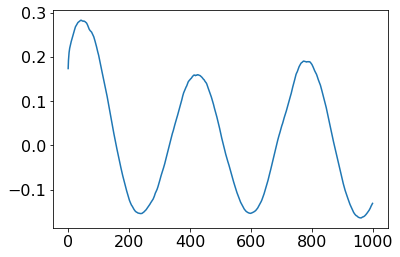

In [88]:

import statsmodels.api as sm

#X = scaled_df[['PRCP(mm/day)','SRAD(W/m2)','LRAD(W/m2)','TAIR(K)','WINDE(m/s)','WINDN(m/s)','PSURF(Pa)']]
#Y = scaled_df['SWE']

#a=sm.tsa.stattools.ccf(df_Tuol["SWE"], df_Tuol["PRCP(mm/day)"], adjusted=False)
#print(a)
#plt.plot(a[0:1000])

fig, axes = plt.subplots(4,2, figsize =(12,16))
fig.subplots_adjust(hspace=0.7,wspace=0.3)
axes[0,0].sm.tsa.stattools.ccf(df_Tuol["SWE"], df_Tuol["PRCP(mm/day)"], adjusted=False)
axes[0,0].set_xlabel('lags')
axes[0,0].set_ylabel('correlation')
axes[0,0].set_title("SWE and Precipitation (mm/day)", fontsize=14)
axes[0,0].text(0.5,-0.45,"(a)",transform=axes[0,0].transAxes,fontsize=16)
         
plot_acf(df_Tuol["SRAD(W/m2)"], lags =80, ax=axes[0,1])
axes[0,1].set_xlabel('lags')
axes[0,1].set_ylabel('correlation')
axes[0,1].set_title("Solar Radiation (W/$m^2$)", fontsize=14)
axes[0,1].text(0.5,-0.45,"(b)",transform=axes[0,1].transAxes,fontsize=16)

plot_acf(df_Tuol["TAIR(K)"], lags =80, ax=axes[1,0])
axes[1,0].set_xlabel('lags')
axes[1,0].set_ylabel('correlation')
axes[1,0].set_title("Air Temperature (K)", fontsize=14)
axes[1,0].text(0.5,-0.45,"(c)",transform=axes[1,0].transAxes,fontsize=16)

plot_acf(df_Tuol["LRAD(W/m2)"], lags =80, ax=axes[1,1])
axes[1,1].set_xlabel('lags')
axes[1,1].set_ylabel('correlation')
axes[1,1].set_title("Longwave Radiation (W/$m^2$)", fontsize=14)
axes[1,1].text(0.5,-0.45,"(d)",transform=axes[1,1].transAxes,fontsize=16)

plot_acf(df_Tuol["WINDE(m/s)"], lags =15, ax=axes[2,0])
axes[2,0].set_xlabel('lags')
axes[2,0].set_ylabel('correlation')
axes[2,0].set_title("Wind-East (m/s)", fontsize=14)
axes[2,0].text(0.5,-0.45,"(e)",transform=axes[2,0].transAxes,fontsize=16)

plot_acf(df_Tuol["WINDN(m/s)"], lags =15, ax=axes[2,1])
axes[2,1].set_xlabel('lags')
axes[2,1].set_ylabel('correlation')         
axes[2,1].set_title("Wind-North (m/s)", fontsize=14)
axes[2,1].text(0.5,-0.45,"(f)",transform=axes[2,1].transAxes,fontsize=16)

plot_acf(df_Tuol["PSURF(Pa)"], lags =10, ax=axes[3,0])
axes[3,0].set_xlabel('lags')
axes[3,0].set_ylabel('correlation')
axes[3,0].set_title("Surface Pressure (Pa)", fontsize=14)
axes[3,0].text(0.5,-0.45,"(g)",transform=axes[3,0].transAxes,fontsize=16)

plot_acf(df_Tuol["SWE"], lags =90, ax=axes[3,1])
axes[3,1].set_xlabel('lags')
axes[3,1].set_ylabel('correlation')
axes[3,1].set_title("SWE (mm/day)", fontsize=14)
axes[3,1].text(0.5,-0.45,"(h)",transform=axes[3,1].transAxes,fontsize=16)


Text(0.5, -0.3, '(g)')

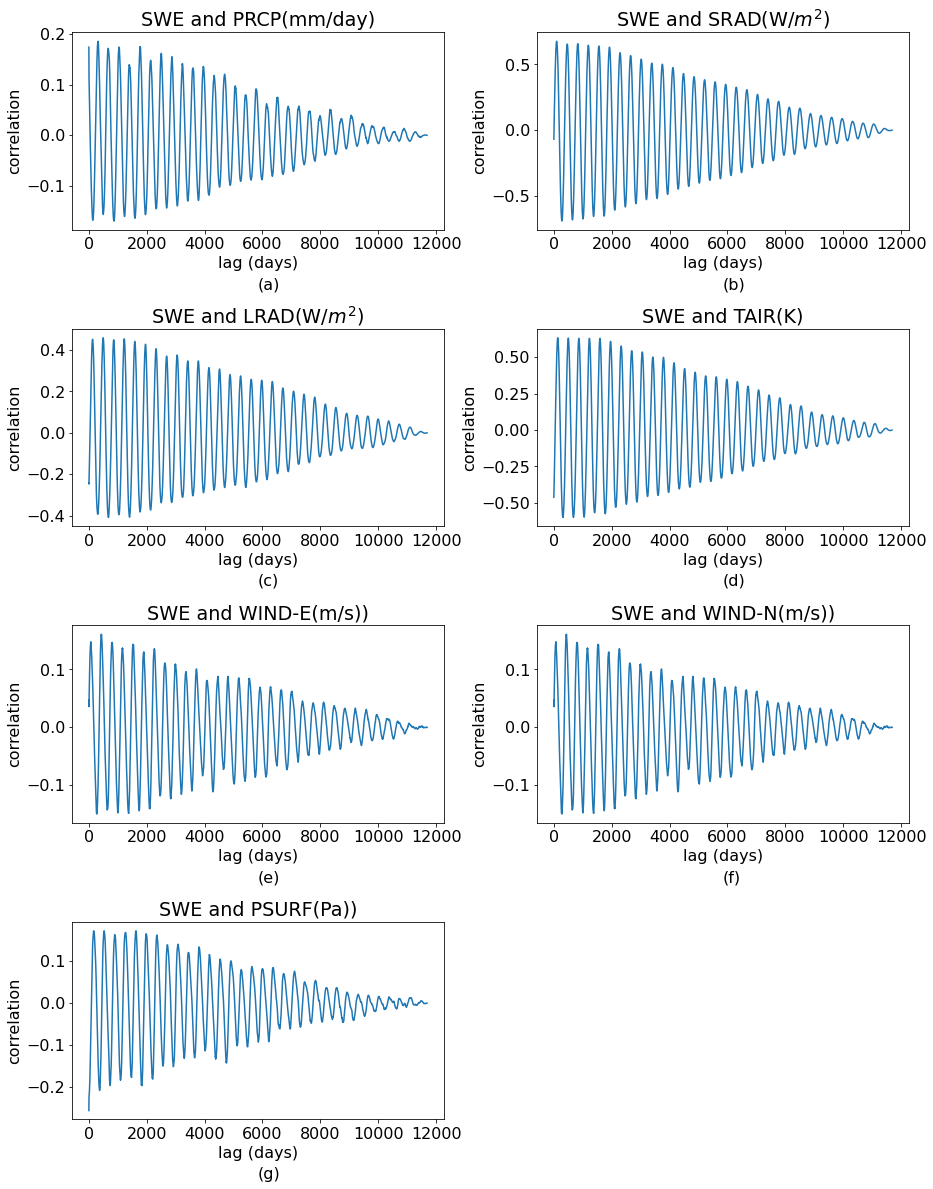

In [105]:
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(wspace=0.25, hspace=0.5)

ax1 = plt.subplot(4,2,1)
ax1.plot(sm.tsa.stattools.ccf(df_Tuol["PRCP(mm/day)"],df_Tuol["SWE"], adjusted=False))
ax1.set_ylabel("correlation", fontsize=16)
ax1.set_xlabel("lag (days)", fontsize=16)
ax1.set_title("SWE and PRCP(mm/day)")
ax1.text(0.5,-0.3,"(a)",transform=ax1.transAxes, fontsize=16)

ax2 = plt.subplot(4,2,2)
ax2.plot(sm.tsa.stattools.ccf(df_Tuol["SRAD(W/m2)"],df_Tuol["SWE"], adjusted=False))
ax2.set_ylabel("correlation", fontsize=16)
ax2.set_xlabel("lag (days)", fontsize=16)
ax2.set_title("SWE and SRAD(W/$m^2$)")
ax2.text(0.5,-0.3,"(b)",transform=ax2.transAxes, fontsize=16)

ax3 = plt.subplot(4,2,3)
ax3.plot(sm.tsa.stattools.ccf(df_Tuol["LRAD(W/m2)"],df_Tuol["SWE"],adjusted=False))
ax3.set_ylabel("correlation", fontsize=16)
ax3.set_xlabel("lag (days)", fontsize=16)
ax3.set_title("SWE and LRAD(W/$m^2$)")
ax3.text(0.5,-0.3,"(c)",transform=ax3.transAxes, fontsize=16)

ax4 = plt.subplot(4,2,4)
ax4.plot(sm.tsa.stattools.ccf(df_Tuol["TAIR(K)"], df_Tuol["SWE"], adjusted=False))
ax4.set_ylabel("correlation", fontsize=16)
ax4.set_xlabel("lag (days)", fontsize=16)
ax4.set_title("SWE and TAIR(K)")
ax4.text(0.5,-0.3,"(d)",transform=ax4.transAxes, fontsize=16)

ax5 = plt.subplot(4,2,5)
ax5.plot(sm.tsa.stattools.ccf(df_Tuol["WINDE(m/s)"], df_Tuol["SWE"], adjusted=False))
ax5.set_ylabel("correlation", fontsize=16)
ax5.set_xlabel("lag (days)", fontsize=16)
ax5.set_title("SWE and WIND-E(m/s))")
ax5.text(0.5,-0.3,"(e)",transform=ax5.transAxes, fontsize=16)

ax6 = plt.subplot(4,2,6)
ax6.plot(sm.tsa.stattools.ccf(df_Tuol["WINDN(m/s)"], df_Tuol["SWE"], adjusted=False))
ax6.set_ylabel("correlation", fontsize=16)
ax6.set_xlabel("lag (days)", fontsize=16)
ax6.set_title("SWE and WIND-N(m/s))")
ax6.text(0.5,-0.3,"(f)",transform=ax6.transAxes, fontsize=16)

ax7 = plt.subplot(4,2,7)
ax7.plot(sm.tsa.stattools.ccf(df_Tuol["PSURF(Pa)"], df_Tuol["SWE"], adjusted=False))
ax7.set_ylabel("correlation", fontsize=16)
ax7.set_xlabel("lag (days)", fontsize=16)
ax7.set_title("SWE and PSURF(Pa))")
ax7.text(0.5,-0.3,"(g)",transform=ax7.transAxes, fontsize=16)

Text(0.5, -0.3, '(a)')

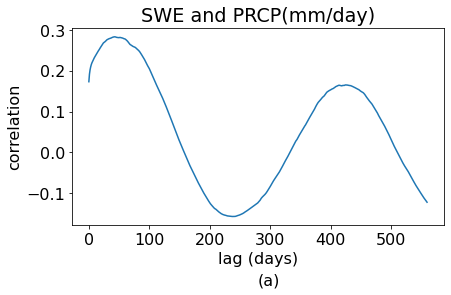

In [111]:
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(wspace=0.25, hspace=0.5)

ax1 = plt.subplot(4,2,1)
ax1.plot(sm.tsa.stattools.ccf(df_Tuol["SWE"], df_Tuol["PRCP(mm/day)"],1)[0:560])
ax1.set_ylabel("correlation", fontsize=16)
ax1.set_xlabel("lag (days)", fontsize=16)
ax1.set_title("SWE and PRCP(mm/day)")
ax1.text(0.5,-0.3,"(a)",transform=ax1.transAxes, fontsize=16)

In [100]:
x= df[['PRCP(mm/day)','SRAD(W/m2)','LRAD(W/m2)','TAIR(K)','WINDE(m/s)','WINDN(m/s)','PSURF(Pa)']]
y = df['SWE']

In [82]:
df_Tuol

,Date,TAIR(K),QAIR(Kg/Kg),PSURF(Pa),WINDE(m/s),WINDN(m/s),LRAD(W/m2),PRCP(mm/day),PRCP_avg(mm/day),SRAD(W/m2),SWE
0,10/1/1984,279.17,0.0051,81550.98,2.24,2.24,303.44,1.603,0.067,135.35,0.000
1,10/2/1984,281.44,0.0049,81780.42,-0.70,-0.70,256.37,0.071,0.003,213.79,0.000
2,10/3/1984,283.27,0.0050,81869.04,1.09,1.09,261.40,0.000,0.000,213.03,0.000
3,10/4/1984,283.39,0.0049,81930.18,1.74,1.74,259.68,0.000,0.000,211.59,0.000
4,10/5/1984,283.02,0.0049,81953.54,0.89,0.89,254.77,0.000,0.000,209.98,0.000
...,...,...,...,...,...,...,...,...,...,...,...
11683,9/26/2016,290.98,0.0041,82506.89,-1.32,-1.32,277.44,0.000,0.000,227.92,0.317
11684,9/27/2016,291.16,0.0041,82264.06,0.28,0.28,275.94,0.000,0.000,226.80,0.310
11685,9/28/2016,291.22,0.0041,82080.91,0.35,0.35,278.47,0.000,0.000,222.98,0.304
11686,9/29/2016,289.84,0.0045,82231.88,1.98,1.98,279.66,0.000,0.000,220.49,0.298


In [80]:
import statsmodels.api as sm
a=sm.tsa.stattools.ccf(Y_Tuol, X_Tuol["PRCP(mm/day)"], adjusted=False)
plt.plot(a)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

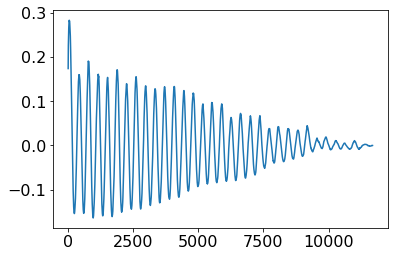

In [101]:
a=sm.tsa.stattools.ccf(y, x["PRCP(mm/day)"], adjusted=False)
np.savetxt("Tuol_corr_SWE_PRCP.txt",a)
plt.plot(a)

In [71]:
df_qobs_Tuol = pd.read_csv("/home/esthapit/Machine_Learning/LSTM_runs/df_qobs_Tuol.csv")
df_qobs_Merc = pd.read_csv("/home/esthapit/Machine_Learning/LSTM_runs/df_qobs_Merc.csv")
df_qobs_Amer = pd.read_csv("/home/esthapit/Machine_Learning/LSTM_runs/df_qobs_Amer.csv")
df_qobs_Feat = pd.read_csv("/home/esthapit/Machine_Learning/LSTM_runs/df_qobs_Feat.csv")

df_qsim_Tuol = pd.read_csv("/home/esthapit/Machine_Learning/LSTM_runs/df_qsim_Tuol.csv")
df_qsim_Merc = pd.read_csv("/home/esthapit/Machine_Learning/LSTM_runs/df_qsim_Merc.csv")
df_qsim_Amer = pd.read_csv("/home/esthapit/Machine_Learning/LSTM_runs/df_qsim_Amer.csv")
df_qsim_Feat = pd.read_csv("/home/esthapit/Machine_Learning/LSTM_runs/df_qsim_Feat.csv")
df_qsim_Feat.head()

,date,time_step,QObs(mm/d)_sim
0,1990-10-01,0,2.691452
1,1990-10-02,0,2.279221
2,1990-10-03,0,1.967926
3,1990-10-04,0,2.245155
4,1990-10-05,0,2.641151


In [75]:
X_Tuol = np.array(df_qobs_Tuol['QObs(mm/d)_obs']).reshape(-1, 1)
y_Tuol = np.array(df_qsim_Tuol['QObs(mm/d)_sim']).reshape(-1, 1)

X_Merc = np.array(df_qobs_Merc['QObs(mm/d)_obs']).reshape(-1, 1)
y_Merc = np.array(df_qsim_Merc['QObs(mm/d)_sim']).reshape(-1, 1)

X_Amer = np.array(df_qobs_Amer['QObs(mm/d)_obs']).reshape(-1, 1)
y_Amer = np.array(df_qsim_Amer['QObs(mm/d)_sim']).reshape(-1, 1)

X_Feat = np.array(df_qobs_Feat['QObs(mm/d)_obs']).reshape(-1, 1)
y_Feat = np.array(df_qsim_Feat['QObs(mm/d)_sim']).reshape(-1, 1)

In [78]:
from sklearn.linear_model import LinearRegression

reg_Tuol = LinearRegression().fit(X_Tuol, y_Tuol)
print("R-squared Tuolumne {}".format(reg_Tuol.score(X_Tuol, y_Tuol))) #R-squared

reg_Merc = LinearRegression().fit(X_Merc, y_Merc)
print("R-squared Merced {}".format(reg_Merc.score(X_Merc, y_Merc)))

reg_Amer = LinearRegression().fit(X_Amer, y_Amer)
print("R-squared American {}".format(reg_Amer.score(X_Amer, y_Amer)))

reg_Feat = LinearRegression().fit(X_Feat, y_Feat)
print("R-squared Feather {}".format(reg_Feat.score(X_Feat, y_Feat)))

R-squared Tuolumne 0.8841657579368444
R-squared Merced 0.9588642667426777
R-squared American 0.8606262969291563
R-squared Feather 0.9135750244320093


In [79]:
PBIAS_Tuol = 100*((X_Tuol - y_Tuol).sum())/(X_Tuol.sum())
print("PBIAS for Tuolumne: {}".format(PBIAS_Tuol))
PBIAS_Merc = 100*((X_Merc - y_Merc).sum())/(X_Merc.sum())
print("PBIAS for Merced: {}".format(PBIAS_Merc))
PBIAS_Amer = 100*((X_Amer - y_Amer).sum())/(X_Amer.sum())
print("PBIAS for American: {}".format(PBIAS_Amer))
PBIAS_Feat = 100*((X_Feat - y_Feat).sum())/(X_Feat.sum())
print("PBIAS for Feather: {}".format(PBIAS_Feat))

PBIAS for Tuolumne: 10.33739066423271
PBIAS for Merced: 3.078475492242477
PBIAS for American: 24.127267657606918
PBIAS for Feather: 27.26464427315575
